In [1]:
import timeit
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt

import pyclesperanto_prototype as proto
import pyclesperanto as cle

cle.select_device()
cle.set_wait_for_kernel_to_finish(True)

proto.select_device()
proto.set_wait_for_kernel_finish(True)

sizes = np.arange(1, 200, 10)
warmup_iter = 1
eval_iter = 3

seed_value = 42

In [2]:
def mb_to_bytes(mb:int = 1) -> int:
    return mb * 1024 * 1024

def shape_from_elements(bytes:int) -> tuple:
    elements = bytes / 4
    shape = int(np.power(elements, 1/3))
    return (shape, shape, shape)

def generate_random_image(size:int = 128) -> np.ndarray:
    """
    Generates a random image of given size and sigma.
    """
    shape = shape_from_elements(mb_to_bytes(size))
    return np.random.rand(shape[0], shape[1], shape[2]).astype(np.float32)

def benchmark_function(target_function, operation:str, framework:str) -> pd.DataFrame:
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    np.random.seed(seed_value)
    benchmark_data = []
    for size in sizes:
        # make new data
        image = generate_random_image(size)
        size_mb = image.size * image.itemsize / 1024 / 1024
        # bind target function to given image
        partial_function = partial(target_function, image)
        # warmup       
        _ = timeit.timeit(partial_function, number=warmup_iter)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=eval_iter)
        
        print(f"Processing {image.shape} of {size_mb} Mb with {framework}... {time_in_s} s")

        # store results
        benchmark_data.append(pd.DataFrame({"benchmark": operation, "framework": framework, "size": size_mb, "time": time_in_s}, index=[0]))
    return pd.concat(benchmark_data)

## Push()

In [3]:
def pycle_function(image):
    cle.push(image)

def prototype_function(image):
    proto.push(image)

In [4]:
pycle_benchmark_push = benchmark_function(pycle_function, "push", "pyclesperanto")
prototype_benchmark_push = benchmark_function(prototype_function, "push", "prototype")

Processing (63, 63, 63) of 0.9538536071777344 Mb with pyclesperanto... 0.0011218630006624153 s
Processing (142, 142, 142) of 10.922576904296875 Mb with pyclesperanto... 0.00640331199974753 s
Processing (176, 176, 176) of 20.796875 Mb with pyclesperanto... 0.010776410999824293 s
Processing (201, 201, 201) of 30.97763442993164 Mb with pyclesperanto... 0.016249727999820607 s
Processing (220, 220, 220) of 40.618896484375 Mb with pyclesperanto... 0.020707935000245925 s
Processing (237, 237, 237) of 50.78145217895508 Mb with pyclesperanto... 0.023932888001581887 s
Processing (251, 251, 251) of 60.3227653503418 Mb with pyclesperanto... 0.028446993999750703 s
Processing (265, 265, 265) of 70.99008560180664 Mb with pyclesperanto... 0.03473345500060532 s
Processing (276, 276, 276) of 80.202392578125 Mb with pyclesperanto... 0.038102012000308605 s
Processing (287, 287, 287) of 90.17907333374023 Mb with pyclesperanto... 0.04251738099992508 s
Processing (298, 298, 298) of 100.95059204101562 Mb with

# Create()

In [5]:
def pycle_function(image):
    cle.create(image.shape)

def prototype_function(image):
    proto.create(image.shape)

In [6]:
pycle_benchmark_create = benchmark_function(pycle_function, "create", "pyclesperanto")
prototype_benchmark_create = benchmark_function(prototype_function, "create", "prototype")

Processing (63, 63, 63) of 0.9538536071777344 Mb with pyclesperanto... 1.6179999875021167e-05 s
Processing (142, 142, 142) of 10.922576904296875 Mb with pyclesperanto... 1.5593001080560498e-05 s
Processing (176, 176, 176) of 20.796875 Mb with pyclesperanto... 1.5060999430716038e-05 s
Processing (201, 201, 201) of 30.97763442993164 Mb with pyclesperanto... 1.547499959997367e-05 s
Processing (220, 220, 220) of 40.618896484375 Mb with pyclesperanto... 1.5104998965398408e-05 s
Processing (237, 237, 237) of 50.78145217895508 Mb with pyclesperanto... 1.4868001017021015e-05 s
Processing (251, 251, 251) of 60.3227653503418 Mb with pyclesperanto... 1.4942001143936068e-05 s
Processing (265, 265, 265) of 70.99008560180664 Mb with pyclesperanto... 1.4453000403591432e-05 s
Processing (276, 276, 276) of 80.202392578125 Mb with pyclesperanto... 1.411300036124885e-05 s
Processing (287, 287, 287) of 90.17907333374023 Mb with pyclesperanto... 1.4764000297873281e-05 s
Processing (298, 298, 298) of 100.95

# Pull()

In [7]:
def pycle_function(image):
    h = cle.push(image)
    cle.pull(h)

def prototype_function(image):
    h = proto.push(image)
    proto.pull(h)

In [8]:
pycle_benchmark_pull = benchmark_function(pycle_function, "push_pull", "pyclesperanto")
prototype_benchmark_pull = benchmark_function(prototype_function, "push_pull", "prototype")
pycle_benchmark_pull["time"] = pycle_benchmark_pull["time"] - pycle_benchmark_push["time"]
prototype_benchmark_pull["time"] = prototype_benchmark_pull["time"] - prototype_benchmark_push["time"]

Processing (63, 63, 63) of 0.9538536071777344 Mb with pyclesperanto... 0.003428535999773885 s
Processing (142, 142, 142) of 10.922576904296875 Mb with pyclesperanto... 0.01445139499992365 s
Processing (176, 176, 176) of 20.796875 Mb with pyclesperanto... 0.017522300000564428 s
Processing (201, 201, 201) of 30.97763442993164 Mb with pyclesperanto... 0.039432520999980625 s
Processing (220, 220, 220) of 40.618896484375 Mb with pyclesperanto... 0.054152564000105485 s
Processing (237, 237, 237) of 50.78145217895508 Mb with pyclesperanto... 0.08368110700030229 s
Processing (251, 251, 251) of 60.3227653503418 Mb with pyclesperanto... 0.09854991900101595 s
Processing (265, 265, 265) of 70.99008560180664 Mb with pyclesperanto... 0.11512138699981733 s
Processing (276, 276, 276) of 80.202392578125 Mb with pyclesperanto... 0.10287863600024139 s
Processing (287, 287, 287) of 90.17907333374023 Mb with pyclesperanto... 0.1416574769991712 s
Processing (298, 298, 298) of 100.95059204101562 Mb with pycl

## Results

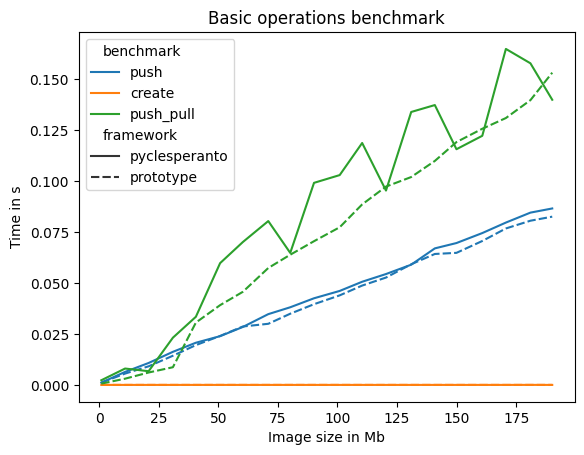

In [9]:
import seaborn as sns

bench = pd.concat([pycle_benchmark_push, prototype_benchmark_push, pycle_benchmark_create, prototype_benchmark_create, pycle_benchmark_pull, prototype_benchmark_pull])

# plot using seaborn the time vs size for each operation and framework on the same plot
# set the title to "Basic operations benchmark"
# set the x label to "Image size in Mb"
# set the y label to "Time in s"
sns.lineplot(x="size", y="time", hue="benchmark", style="framework", data=bench)
plt.title("Basic operations benchmark")
plt.xlabel("Image size in Mb")
plt.ylabel("Time in s")
plt.show()